In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [66]:
def bit_reducer(bits, axes):
    skull = cv2.imread('img_data/skull.tif', 0)
    s = skull.shape
    for i in range(0, s[0]):
        for j in range(0, s[1]):
            skull[i, j] = int(skull[i, j]/bits)*bits
    plt.subplot(axes), plt.imshow(skull, cmap = 'gray')

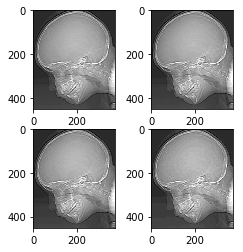

In [75]:
bit_reducer(1, 231)
bit_reducer(2, 232)
bit_reducer(4, 234)
bit_reducer(8, 235)

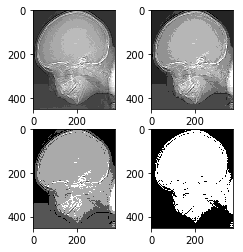

In [76]:
bit_reducer(16, 231)
bit_reducer(32, 232)
bit_reducer(64, 234)
bit_reducer(128, 235)

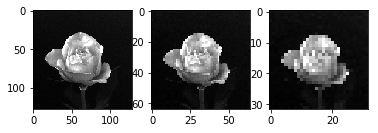

In [83]:
#2.2
rose = cv2.imread('img_data/rose.tif', 0)
img128n = cv2.resize(rose, (128, 128), interpolation = cv2.INTER_NEAREST)
img64n = cv2.resize(rose, (64, 64), interpolation = cv2.INTER_NEAREST)
img32n = cv2.resize(rose, (32, 32), interpolation = cv2.INTER_NEAREST)
plt.subplot(231), plt.imshow(img128n, cmap='gray')
plt.subplot(232), plt.imshow(img64n, cmap='gray')
plt.subplot(233), plt.imshow(img32n, cmap='gray')
plt.show()

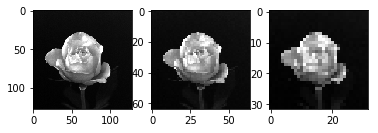

In [90]:
rose = cv2.imread('img_data/rose.tif', 0)
img128b = cv2.resize(rose, (128, 128), interpolation = cv2.INTER_LINEAR)
img64b = cv2.resize(rose, (64, 64), interpolation = cv2.INTER_LINEAR)
img32b = cv2.resize(rose, (32, 32), interpolation = cv2.INTER_LINEAR)
plt.subplot(231), plt.imshow(img128b, cmap='gray')
plt.subplot(232), plt.imshow(img64b, cmap='gray')
plt.subplot(233), plt.imshow(img32b, cmap='gray')
plt.show()

In [107]:
#2.3
def f_one(r):
    return 0.33*r

def f_two(r):
    return 3*r - 256

def f_three(r):
    return 0.33*r + 170

th_one = 64
th_two = 128

beans = cv2.imread('img_data2/orig_bean.tif', 0)
s = beans.shape
for i in range(0, s[0]):
    for j in range(0, s[1]):
        if beans[i, j] < th_one:
            beans[i, j] = f_one(beans[i, j])
        if beans[i, j] >= th_one and beans[i, j] <= th_two:
            beans[i, j] = f_two(beans[i, j])
        if beans[i, j] > th_two:
            beans[i, j] = f_three(beans[i, j])

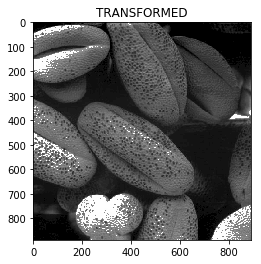

In [103]:
plt.imshow(beans, cmap='gray'), plt.title("TRANSFORMED")
plt.show()

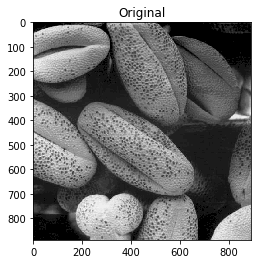

In [113]:
o_beans = cv2.imread('img_data2/orig_bean.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(o_beans, cmap='gray'), plt.title("Original")
plt.show()

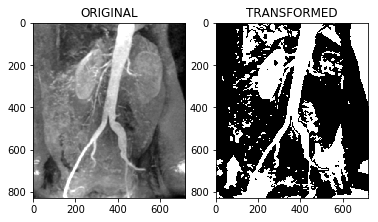

In [3]:
#2.4
th_one = 65
th_two = 130

kidney_org = cv2.imread('img_data2/kidney.tif', 0)
kidney = cv2.imread('img_data2/kidney.tif', 0)
plt.show()
s = kidney.shape
for i in range(0, s[0]):
    for j in range(0, s[1]):
        if kidney[i, j] < th_one or kidney[i, j] > th_two:
            kidney[i, j] = 150
        else:
            kidney[i, j] = 20
plt.subplot(121), plt.imshow(kidney_org, cmap='gray'), plt.title("ORIGINAL")
plt.subplot(122), plt.imshow(kidney, cmap='gray'), plt.title("TRANSFORMED")
plt.show()

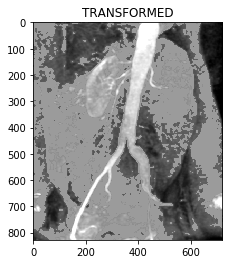

In [137]:
th_one = 90
th_two = 128

kidney = cv2.imread('img_data2/kidney.tif', 0)
s = kidney.shape
for i in range(0, s[0]):
    for j in range(0, s[1]):
        if kidney[i, j] > th_one and kidney[i, j] < th_two:
            kidney[i, j] = 140
        else:
            kidney[i, j] = kidney[i, j]
plt.imshow(kidney, cmap='gray'), plt.title("TRANSFORMED")
plt.show()

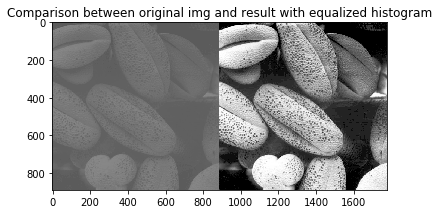

In [13]:
#2.5
img = cv2.imread('img_data2/orig_bean.tif', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
plt.imshow(res, cmap='gray')
plt.title('Comparison between original img and result with equalized histogram')
plt.show()

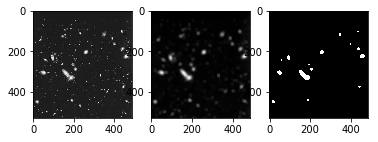

In [2]:
#2.8
kernel = np.ones((15,15),np.float32)/225

img = cv2.imread('img_data2/hubble.tif', 0)

blurred = cv2.filter2D(img, -1, kernel)

dst = cv2.filter2D(img, -1, kernel)

for i in range(0, dst.shape[0]):
    for j in range(0, dst.shape[1]):
        if dst[i, j] > 100:
            dst[i, j] = 255
        else: dst[i, j] = 0

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.subplot(132), plt.imshow(blurred, cmap='gray')
plt.subplot(133), plt.imshow(dst, cmap='gray')
plt.show()

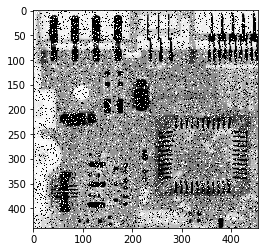

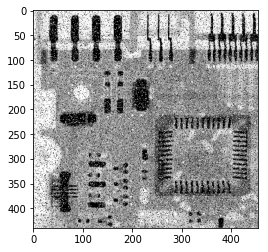

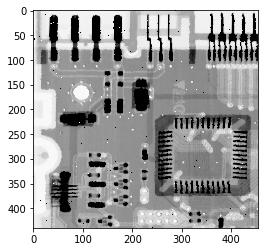

In [8]:
#3.35
kernel_size = 3

img = cv2.imread('img_data2/noisy_board.tif', 0)

gauss_blur = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
median_blur = cv2.medianBlur(img, kernel_size)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(gauss_blur, cmap='gray')
plt.show()
plt.imshow(median_blur, cmap='gray')
plt.show()

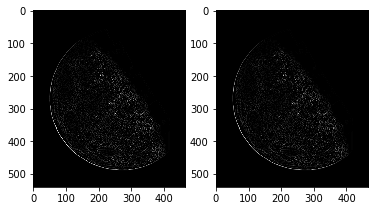

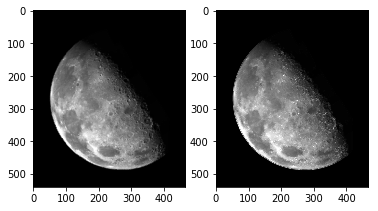

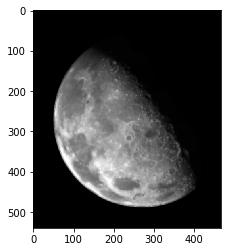

In [49]:
#3.38
img = cv2.imread('img_data2/blurry_moon.tif', 0)

# Лапласын кернел
kernel4c = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.int8)
kernel8c = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.int8)

#Кернелийн шууд үр дүн
dst4c = cv2.filter2D(img, -1, kernel4c)
dst8c = cv2.filter2D(img, -1, kernel8c)

plt.subplot(1, 2, 1), plt.imshow(dst4c, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(dst8c, cmap='gray')

plt.show()

#Логик үйлдлээр ирмэгүүдийг эх зурагт нэмж Лапласын шүүлтүүр бүрийн хувьд тодруулав
res4c = cv2.bitwise_or(dst4c, img)
res8c = cv2.bitwise_or(dst8c, img)

plt.subplot(1, 2, 1), plt.imshow(res4c, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(res8c, cmap='gray')

plt.show()

#Гауссын блюрээр ирмэгийн оромуудыг арилгав
gres8c = cv2.GaussianBlur(res8c, (3, 3), 0)
plt.imshow(gres8c, cmap='gray')

plt.show()

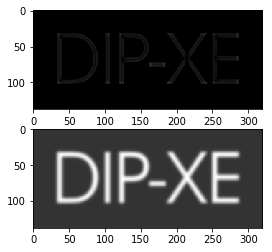

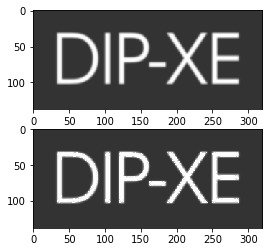

In [14]:
img = cv2.imread('img_data2/dipxe.tif')

#Эхлээд Гауссын филтерээр блюрдэцгээе
blurred = cv2.GaussianBlur(img, (9, 9), 0)

#блюрдсэн зургийг эх зургаас хасав
mask = cv2.addWeighted(img, 1, blurred, -1, 0)

#маскийг 1-с их дискрет утгаар үржиж бүүст филтер болгоцгооё
dst = cv2.bitwise_or(img, 10*mask)

#Эх зураг, Гаусс блюр үр дүнгүүдийг харьцуулцгаая
plt.subplot(2, 1, 1), plt.imshow(mask, cmap="gray")
plt.subplot(2, 1, 2), plt.imshow(blurred, cmap="gray")

plt.show()

#Маск, Бүүст филтерийн үр дүнгүүдийг харьцуулцгаая
plt.subplot(2, 1, 1), plt.imshow(img, cmap="gray")
plt.subplot(2, 1, 2), plt.imshow(dst, cmap="gray")
plt.show()

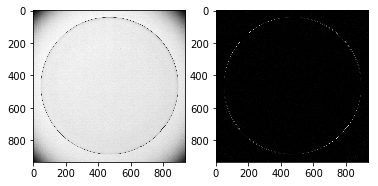

In [94]:
#3.45
img = cv2.imread('img_data2/lens.tif', 0)

sobel = cv2.Sobel(img, cv2.CV_16U, 1, 1, ksize=5)

plt.subplot(1, 2, 1), plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2), plt.imshow(sobel, cmap="gray")
plt.show()

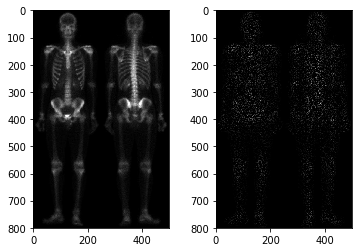

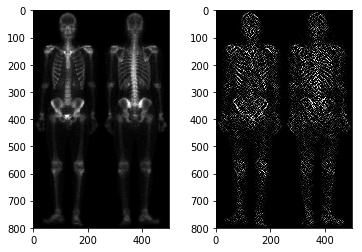

In [106]:
#3.43
img = cv2.imread('img_data2/skeleton.tif', 0)

laplacian = cv2.Laplacian(img, cv2.CV_8U)

#Эх зураг болон Лапласын нь харьцуулалт
plt.subplot(1, 2, 1), plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2), plt.imshow(laplacian, cmap="gray")
plt.show()

#Эхний 2 зурагийн нийлбэр ба Собелийн градиент
comb = cv2.bitwise_or(img, laplacian)
sobel = cv2.Sobel(img, cv2.CV_8U, 1, 1, ksize=5)

plt.subplot(1, 2, 1), plt.imshow(comb, cmap="gray")
plt.subplot(1, 2, 2), plt.imshow(sobel, cmap="gray")
plt.show()

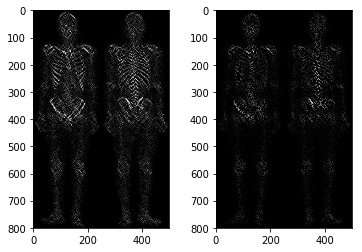

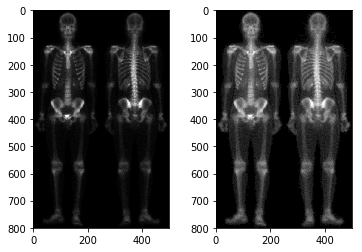

In [133]:
#Собелийн градиентийн чимээг дундажлаж арилгах нь
kernel = np.ones((3, 3), dtype=np.uint8)/9
smooth = cv2.filter2D(sobel, -1, kernel)

#Нийлбэр зураг ба чимээ арилсан Собелийн үржвэр
product = cv2.bitwise_and(comb, smooth)

#Харьцуулалт
plt.subplot(1, 2, 1), plt.imshow(smooth, cmap="gray")
plt.subplot(1, 2, 2), plt.imshow(product, cmap="gray")
plt.show()

#Эх зураг болон үржвэр зурагны нийлбэр үр дүн
total = cv2.bitwise_or(img, product)
plt.subplot(1, 2, 1), plt.imshow(total, cmap="gray")
#power law transformation
plt.subplot(1, 2, 2), plt.imshow(np.power(total, 0.55)*2, cmap="gray")
plt.show()

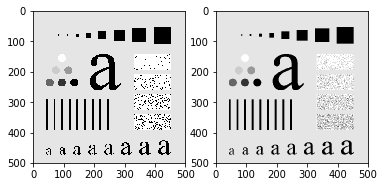

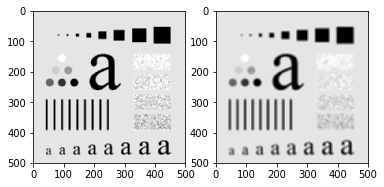

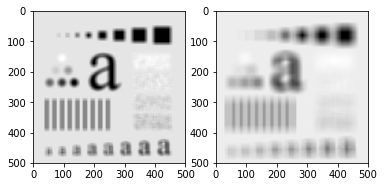

In [147]:
#smoothing linear filter
img = cv2.imread('img_data2/pattern.tif', 0)

#different kernels
k3x3 = np.ones((3, 3), dtype=np.uint8)/9
k5x5 = np.ones((5, 5), dtype=np.uint8)/25
k9x9 = np.ones((9, 9), dtype=np.uint8)/81
k15x15 = np.ones((15, 15), dtype=np.uint8)/225
k35x35 = np.ones((35, 35), dtype=np.uint8)/1225

plt.subplot(1, 2, 1), plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2), plt.imshow(cv2.filter2D(img, -1, k3x3), cmap="gray")
plt.show()
plt.subplot(1, 2, 1), plt.imshow(cv2.filter2D(img, -1, k5x5), cmap="gray")
plt.subplot(1, 2, 2), plt.imshow(cv2.filter2D(img, -1, k9x9), cmap="gray")
plt.show()
plt.subplot(1, 2, 1), plt.imshow(cv2.filter2D(img, -1, k15x15), cmap="gray")
plt.subplot(1, 2, 2), plt.imshow(cv2.filter2D(img, -1, k35x35), cmap="gray")
plt.show()

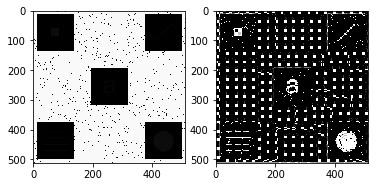

In [21]:
#3.26
img = cv2.imread('img_data2/shapes.tif', 0)

global_hist = cv2.equalizeHist(img)

end_row = img.shape[0] - 3
end_col = img.shape[1] - 3

for x in range(0, end_row):
    for y in range(0, end_col):
        img[x:x+3, y:y+3] = cv2.equalizeHist(img[x:x+3, y:y+3])
        
plt.subplot(1, 2, 1), plt.imshow(global_hist, cmap="gray")
plt.subplot(1, 2, 2), plt.imshow(img, cmap="gray")
plt.show()

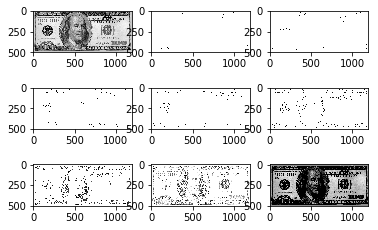

In [41]:
#3.14
img = cv2.imread('img_data2/dollar.tif', 0)

host = np.zeros(img.shape)

high_end = 1

plt.subplot(3, 3, 1), plt.imshow(img, cmap='gray')

for b in range(1, 9):
    high_end = np.power(2, b) - 1
    low_end = high_end / 2
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            if (img[x, y] >= low_end) and (img[x, y] <= high_end):
                host[x, y] = img[x, y]
            else:
                host[x, y] = 128
    plt.subplot(3, 3, b + 1), plt.imshow(host, cmap='gray')
plt.show()